In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib.style

import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from datetime import date, datetime, timedelta

In [102]:
plt.style.use('default')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.cmap'] = 'viridis'

### Model LIbraries

In [29]:
#Model Libraries Below
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, SpectralClustering

#Preprocessing Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Model evalutaion and Vizualization tools
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
from collections import Counter
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

### Import final_scaled_df and non scaled

In [3]:
normal_df = pd.read_csv('dummy_df.csv')
normal_df = normal_df.set_index('Household Key')
normal_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Bought FSV,Total Cost,...,SC Vehicle Manufacturer Name_VOLVO,SC Vehicle Manufacturer Name_nan,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan
Household Key,,,,,,,,,,,,,,,,,,,,,
875.0,0,1,NaN,650.000000,NaN,NaN,5,1,1,1063.20,...,0,0,0,0,0,0,1,0,0,1
969.0,1,1,95.000000,708.333333,75.5,0.0,2,0,0,226.10,...,0,0,0,1,0,0,0,1,0,0
3338.0,1,0,15.000000,675.000000,89.0,1.0,0,0,0,0.00,...,0,1,0,0,0,1,0,0,0,1
8718.0,1,0,55.000000,737.500000,68.0,0.0,0,0,0,0.00,...,0,1,0,0,1,0,0,1,0,0
11524.0,1,1,157.857143,753.571429,49.0,2.0,3,0,0,294.25,...,0,0,0,0,1,0,0,1,0,0


In [4]:
normal_df.shape

(5240, 694)

In [5]:
normal_df.dropna(inplace = True)

In [6]:
normal_df.shape

(3273, 694)

In [7]:
scaled_df = pd.read_csv('scaled_final_df.csv')
scaled_df = scaled_df.set_index('Household Key')
scaled_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Bought FSV,Total Cost,...,SC Vehicle Manufacturer Name_VOLVO,SC Vehicle Manufacturer Name_nan,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan
Household Key,,,,,,,,,,,,,,,,,,,,,
875,0,1,NaN,0.418605,NaN,NaN,0.238095,0.035714,1,0.485568,...,0,0,0,0,0,0,1,0,0,1
969,1,1,0.354167,0.612403,0.685897,0.000000,0.095238,0.000000,0,0.103261,...,0,0,0,1,0,0,0,1,0,0
3338,1,0,0.020833,0.501661,0.858974,0.166667,0.000000,0.000000,0,0.000000,...,0,1,0,0,0,1,0,0,0,1
8718,1,0,0.187500,0.709302,0.589744,0.000000,0.000000,0.000000,0,0.000000,...,0,1,0,0,1,0,0,1,0,0
11524,1,1,0.616071,0.762696,0.346154,0.333333,0.142857,0.000000,0,0.134385,...,0,0,0,0,1,0,0,1,0,0


In [8]:
scaled_df.dropna(inplace = True)
scaled_df.shape

(3273, 694)

In [9]:
scaled_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Bought FSV,Total Cost,...,SC Vehicle Manufacturer Name_VOLVO,SC Vehicle Manufacturer Name_nan,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan
Household Key,,,,,,,,,,,,,,,,,,,,,
969,1,1,0.354167,0.612403,0.685897,0.000000,0.095238,0.0,0,0.103261,...,0,0,0,1,0,0,0,1,0,0
3338,1,0,0.020833,0.501661,0.858974,0.166667,0.000000,0.0,0,0.000000,...,0,1,0,0,0,1,0,0,0,1
8718,1,0,0.187500,0.709302,0.589744,0.000000,0.000000,0.0,0,0.000000,...,0,1,0,0,1,0,0,1,0,0
11524,1,1,0.616071,0.762696,0.346154,0.333333,0.142857,0.0,0,0.134385,...,0,0,0,0,1,0,0,1,0,0
13422,1,1,0.354167,0.480897,0.606838,0.000000,0.095238,0.0,0,0.054279,...,0,0,1,0,0,0,0,0,0,0


### Create DF for Classification vs. Regression

In [10]:
cost = normal_df.pop('Bought FSV')
normal_df['Bought FSV'] = cost

In [11]:
cost = normal_df.pop('Total Cost')
normal_df['Total Cost'] = cost

In [12]:
normal_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969.0,1,1,95.000000,708.333333,75.500000,0.0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338.0,1,0,15.000000,675.000000,89.000000,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718.0,1,0,55.000000,737.500000,68.000000,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524.0,1,1,157.857143,753.571429,49.000000,2.0,3,0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422.0,1,1,95.000000,668.750000,69.333333,0.0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [13]:
cost = scaled_df.pop('Bought FSV')
scaled_df['Bought FSV'] = cost

### Do Some Data Exploration

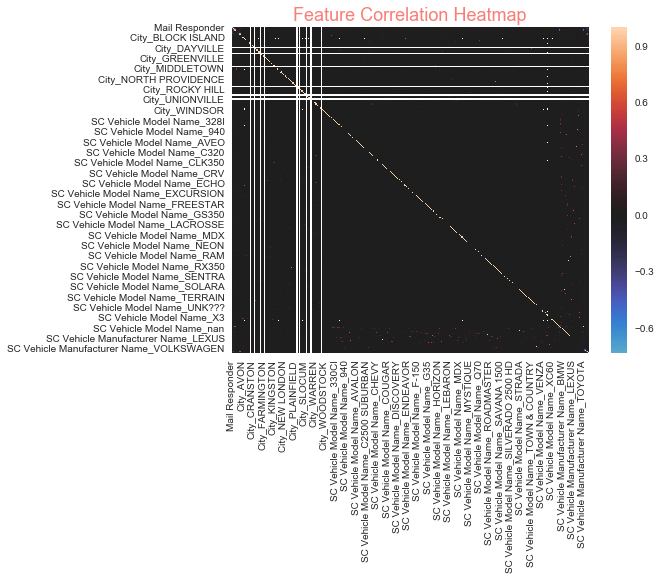

In [90]:
import seaborn as sns
plt.figure(figsize = (8,6))
plt.title("Feature Correlation Heatmap", fontsize = 18, color = "#F97E77")
sns.heatmap(scaled_df.corr(), center = 0)

### Drop Highly Correlated Features

In [15]:
# Create correlation matrix
corr_matrix = normal_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#Drop variables from table
normal_df.drop(columns=to_drop, inplace=True)
normal_df.shape

(3273, 685)

<function matplotlib.pyplot.show(*args, **kw)>

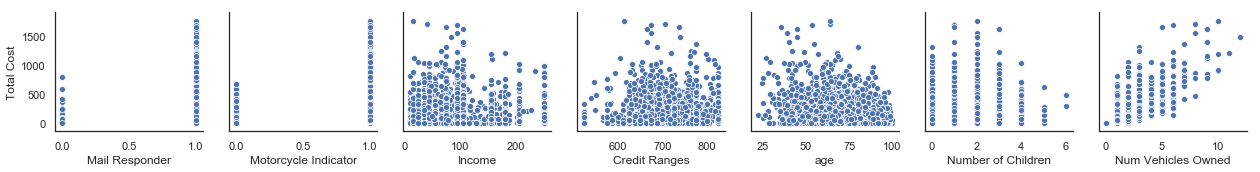

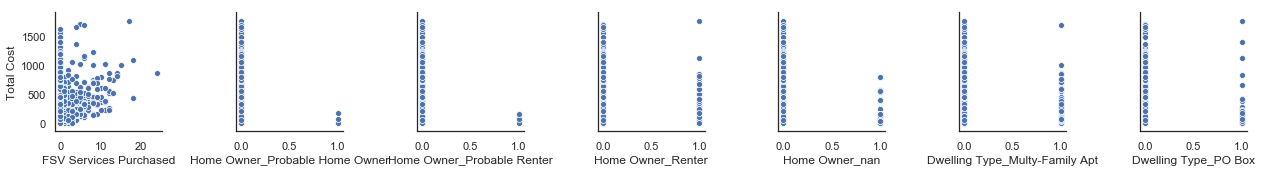

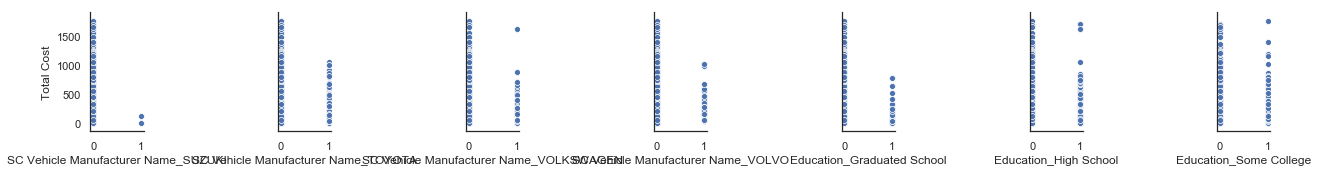

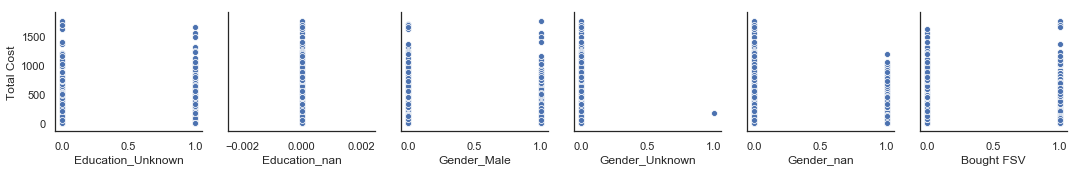

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

variables = list(normal_df.columns)[:-1]
sns.pairplot(normal_df, x_vars=variables[:7], y_vars=['Total Cost'])
sns.pairplot(normal_df, x_vars=variables[7:14], y_vars=['Total Cost'])
sns.pairplot(normal_df, x_vars=variables[671:678], y_vars=['Total Cost'])
sns.pairplot(normal_df, x_vars=variables[678:684], y_vars=['Total Cost'])
plt.savefig('normal_multiplots_corr', bbox_inches = 'tight')
plt.show

# variables = list(test_table.columns)[:-1]
# sns.pairplot(test_table, x_vars=variables[:7], y_vars=['Combined_suicide_rate'])
# sns.pairplot(test_table, x_vars=variables[7:], y_vars=['Combined_suicide_rate'])

### Instantiate some Models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Start With Linear Regression and Decision Tree an Normal DF

In [165]:
rg = Ridge()
lass = Lasso()
tree = DecisionTreeRegressor(max_depth = 4)

### Define X, y training features

In [166]:
X = normal_df.drop('Total Cost', axis = 1)
y = normal_df['Total Cost']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

### Train Models

In [167]:
rg.fit(X_train, y_train)
lass.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [168]:
tree.score(X_test, y_test), rg.score(X_test, y_test), lass.score(X_test, y_test)

(0.6218439874014718, 0.6248831628025509, 0.6631772391679531)

### Write a functions for Model Visuazliation

In [58]:
def model_metrics(model, model_name = 'Linear'):
    yhat = model.predict(X_test)
    RMSE = round(np.sqrt(mean_squared_error(y_test, yhat)), 5)
    z_score = round(RMSE/np.std(y_test),5)
    R_squared = round(model.score(X_test, y_test), 5)
    print(model_name + " " + 'Results')
    print("RMSE = {}, z_score = {}, R_squared = {}".format(RMSE, z_score, R_squared))
    return [('RMSE', RMSE), ('z_score', z_score), ('R2', R_squared)]   

In [208]:
def print_coefs(model, model_name = 'Linear Reg', num_feat = 15,  plot_title = 'Predictive Metrics Importance', x_lab = 'Predictive Features', y_lab = 'Coefficient Size', rotation = 90):
    coefs = model.coef_
    varias = X.columns
    plt.figure(figsize = (14,8))
    plt.title(plot_title + '({})'.format(model_name), fontsize = 24, color = "#535355")
    plt.xlabel(x_lab, fontsize = 18, color = "#050594")
    plt.ylabel(y_lab, fontsize = 18, color = "#050594")
    plt.xticks(rotation=rotation)
    pd.Series(coefs, index=varias).nlargest(num_feat).plot(kind='bar')
    plt.savefig(model_name, bbox_inches = 'tight')
    plt.show

In [163]:
### Comapring Test vs. train
import matplotlib.patches as mpatches

def compare_test_train(model, model_name = 'Linear'):
    def bias(y, y_hat):
        return np.mean(y_hat - y)

    def variance(y_hat):
        return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    bias_train = bias(y_train, y_hat_train)
    bias_test = bias(y_test, y_hat_test)
    var_train = variance(y_hat_train)
    var_test = variance(y_hat_test)
    
    #Test Scores and Metrics
    RMSE = np.sqrt(mean_squared_error(y_test, y_hat_test))
    z_score = RMSE/np.std(y_test)
    R_squared = model.score(X_test, y_test)

    #Train Scores and Metrics
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
    z_score_train = RMSE_train/np.std(y_train)
    R_squared_train = model.score(X_train, y_train)
    
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (15,5))
    
    ax1.set_title("{} y_pred vs y_train".format(model_name), fontsize = 16)
    ax1.set_xlabel("y_train",fontsize = 14, color = "#073A5A")
    ax1.set_ylabel("y_pred",fontsize = 14, color = "#073A5A")
    ax1.scatter(y_train, y_hat_train, color = "blue", label='Actual Data')
    ax1.plot(y_train, y_train, color = "red", label='Model')

    R2_patch = mpatches.Patch(color='#aaff80', label="R_squared_train = {}".format(round(R_squared_train, 3)))
    RMSE_patch = mpatches.Patch(color='#ffd480', label="RMSE_train = {}".format(round(RMSE_train, 3)))
    z_patch = mpatches.Patch(color='#00cccc', label="z_score_train = {}".format(round(z_score_train, 3)))
    Bias_patch = mpatches.Patch(color='#670000', label="Bias_train = {}".format(round(bias_train, 20)))
    Variance_patch = mpatches.Patch(color='#7A9A01', label="Var_train = {}".format(round(var_train, 3)))

    ax1.legend(handles=[R2_patch, RMSE_patch, z_patch, Bias_patch, Variance_patch])

    ax2.set_title("{} y_pred vs y_test".format(model_name), fontsize = 16)
    ax2.set_xlabel("y_test", fontsize = 14, color = "#073A5A")
    ax2.set_ylabel("y_pred", fontsize = 14, color = "#073A5A")
    ax2.scatter(y_test, y_hat_test, color = "blue")
    ax2.plot(y_test, y_test, color = "red")

    R2_patch = mpatches.Patch(color='#aaff80', label="R_squared = {}".format(round(R_squared, 3)))
    RMSE_patch = mpatches.Patch(color='#ffd480', label="RMSE = {}".format(round(RMSE, 3)))
    z_patch = mpatches.Patch(color='#00cccc', label="z_score = {}".format(round(z_score, 3)))
    Bias_patch = mpatches.Patch(color='#670000', label="Bias = {}".format(round(bias_test, 3)))
    Variance_patch = mpatches.Patch(color='#7A9A01', label="Var = {}".format(round(var_test, 3)))

    ax2.legend(handles=[R2_patch, RMSE_patch, z_patch,  Bias_patch, Variance_patch], loc = "upper left")

    plt.savefig(model_name + " " + "Model Comparrison", bbox_inches = 'tight')
    plt.show

### Ridge Details

In [169]:
ridge_metrics = model_metrics(rg, 'Ridge non_scaled feat')

Ridge non_scaled feat Results
RMSE = 107.92474, z_score = 0.61247, R_squared = 0.62488


In [170]:
ridge_metrics

[('RMSE', 107.92474), ('z_score', 0.61247), ('R2', 0.62488)]

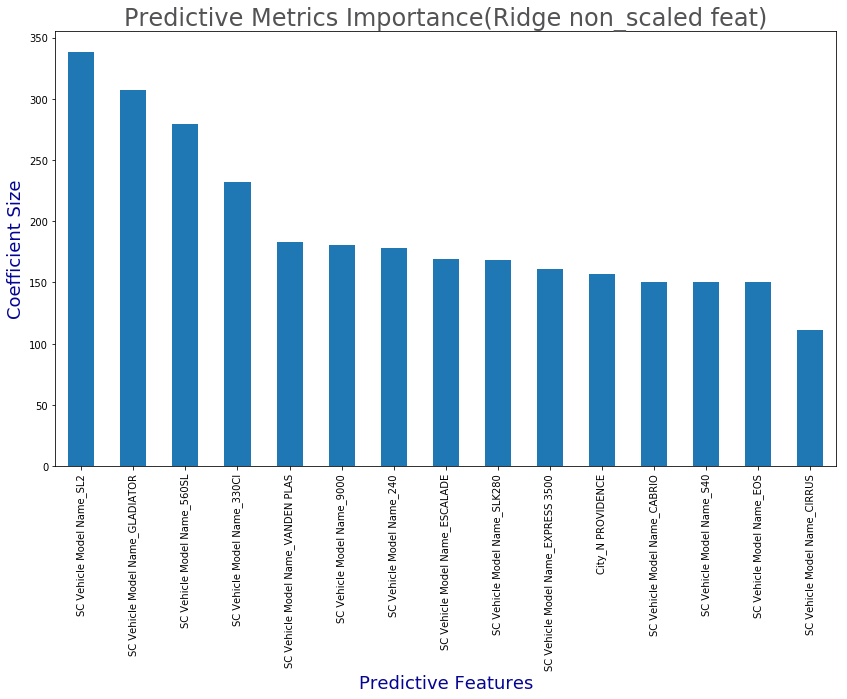

In [108]:
print_coefs(rg, 'Ridge non_scaled feat')

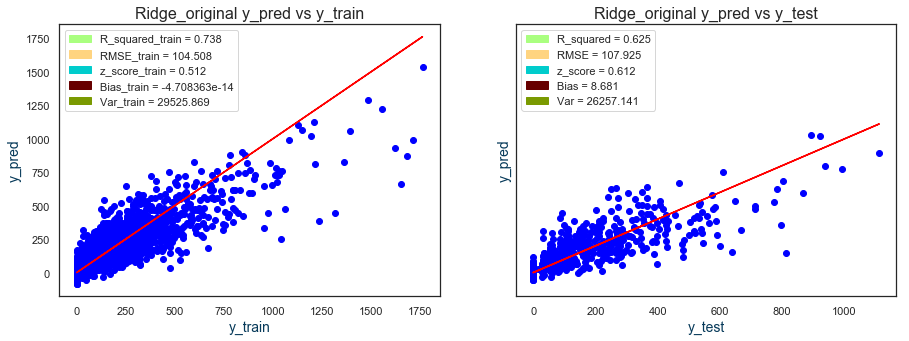

In [171]:
compare_test_train(rg, model_name = 'Ridge_original')

### Visualize R2 and RMSE

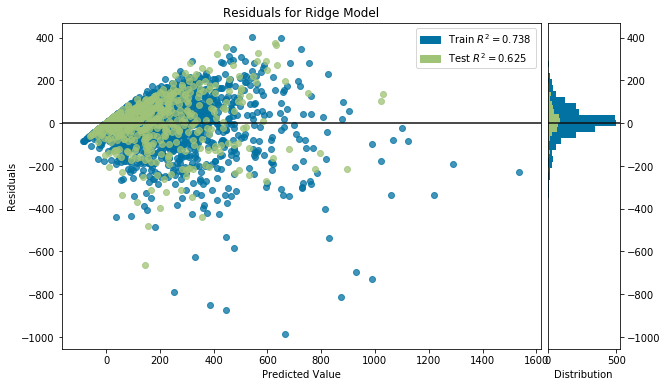

In [134]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

# Instantiate the linear model and visualizer
model = rg
plt.figure(figsize = (10,6))
viz = residuals_plot(model, X_train, y_train, X_test, y_test)

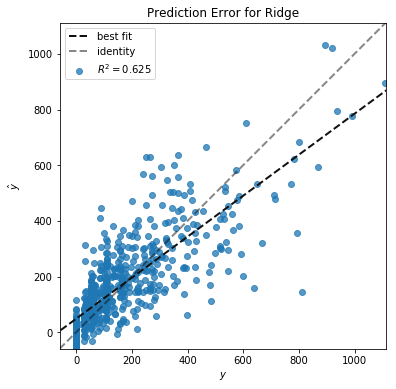

In [135]:
# Instantiate the linear model and visualizer
plt.figure(figsize = (6,6))
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

### Lasso Details

In [172]:
model_metrics(lass, 'Lasso original')

Lasso original Results
RMSE = 102.26769, z_score = 0.58036, R_squared = 0.66318


[('RMSE', 102.26769), ('z_score', 0.58036), ('R2', 0.66318)]

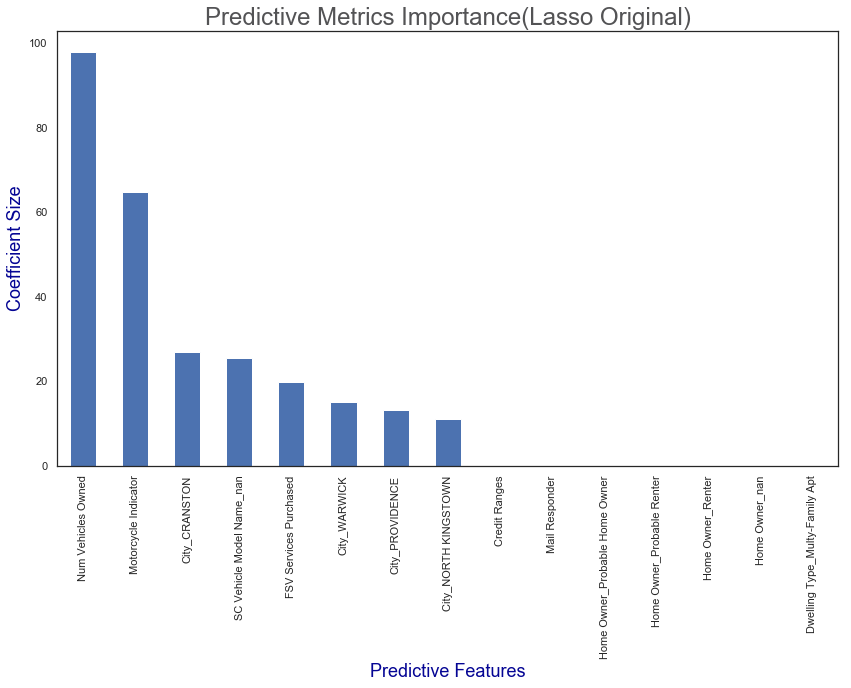

In [173]:
print_coefs(lass, 'Lasso Original')

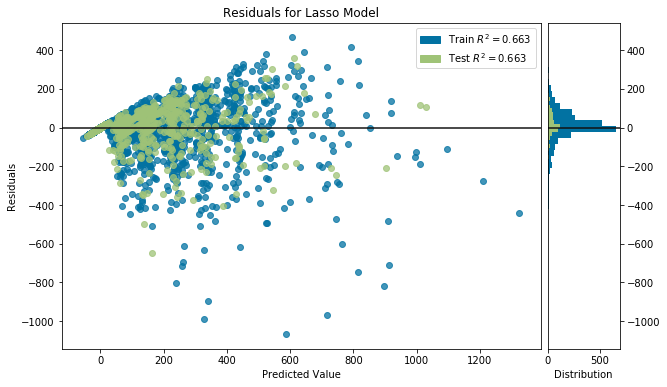

In [132]:
# Instantiate the linear model and visualizer
model = lass
plt.figure(figsize = (10,6))
viz = residuals_plot(model, X_train, y_train, X_test, y_test)

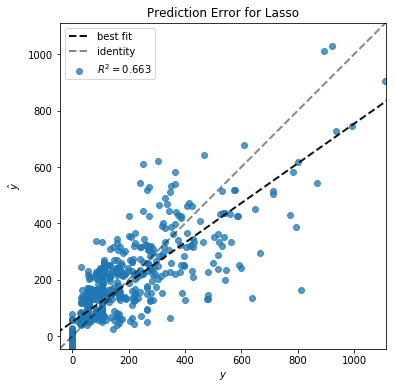

In [133]:
plt.figure(figsize = (6,6))
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

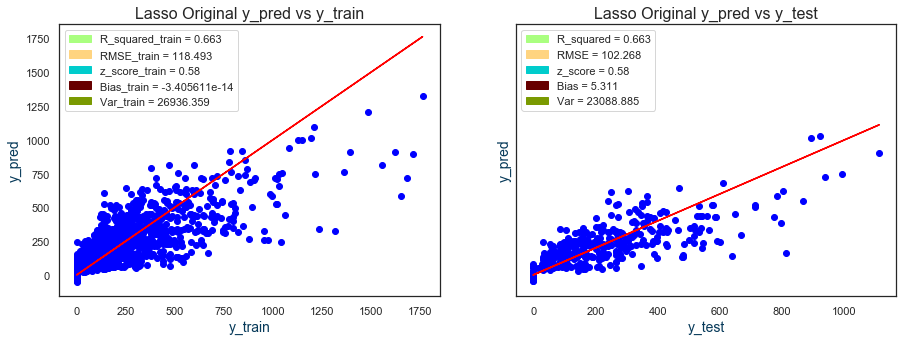

In [174]:
compare_test_train(lass, model_name = 'Lasso Original')

### Decision Tree Visualizations

<function matplotlib.pyplot.show(*args, **kw)>

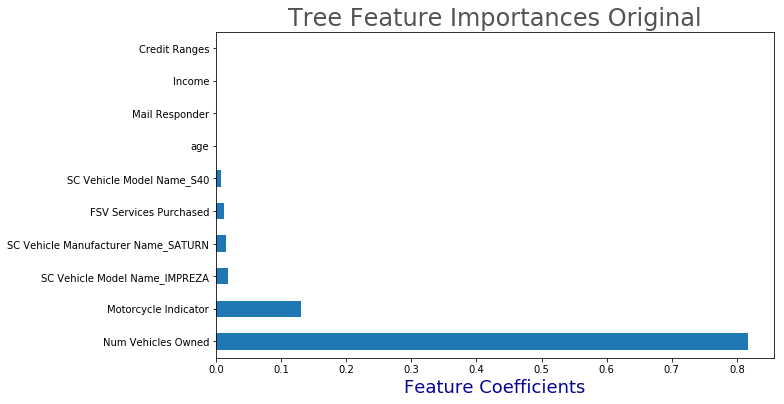

In [127]:
plt.figure(figsize = (10,6))
plt.title('Tree Feature Importances Original', fontsize = 24, color = "#535355")
plt.xlabel('Feature Coefficients', fontsize = 18, color = "#050594")
# plt.ylabel('Feature Name', fontsize = 18, color = "#050594")
# plt.xticks(rotation=rotation)
pd.Series(tree.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.savefig('Decision Tree Original Features', bbox_inches = 'tight')
plt.show

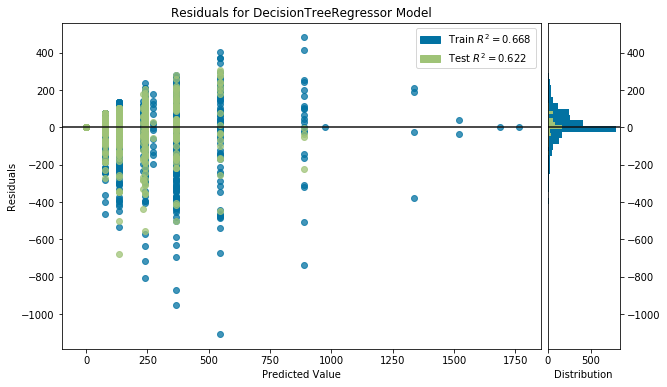

In [130]:
# Instantiate the linear model and visualizer
model = tree
plt.figure(figsize = (10,6))
viz = residuals_plot(model, X_train, y_train, X_test, y_test)

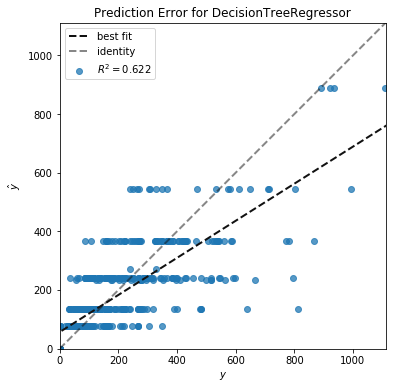

In [131]:
plt.figure(figsize = (6,6))
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

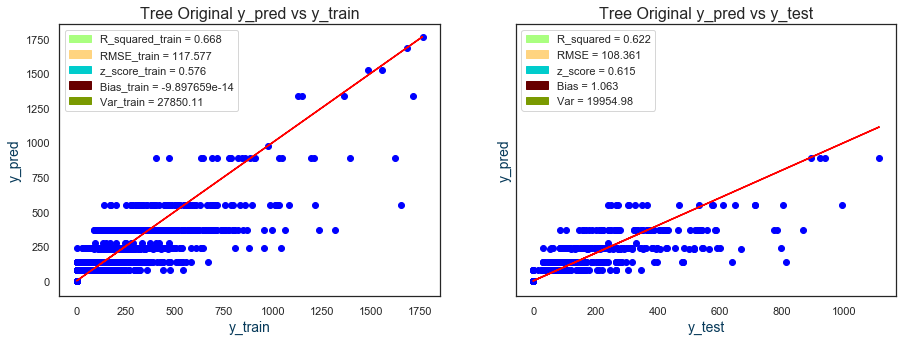

In [175]:
compare_test_train(tree, model_name = 'Tree Original')

### Try Scaling and using Polynomial Features

In [136]:
scaled_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Total Cost,Home Owner_Probable Home Owner,...,SC Vehicle Manufacturer Name_nan,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV
Household Key,,,,,,,,,,,,,,,,,,,,,
969,1,1,0.354167,0.612403,0.685897,0.000000,0.095238,0.0,0.103261,0,...,0,0,1,0,0,0,1,0,0,0
3338,1,0,0.020833,0.501661,0.858974,0.166667,0.000000,0.0,0.000000,0,...,1,0,0,0,1,0,0,0,1,0
8718,1,0,0.187500,0.709302,0.589744,0.000000,0.000000,0.0,0.000000,0,...,1,0,0,1,0,0,1,0,0,0
11524,1,1,0.616071,0.762696,0.346154,0.333333,0.142857,0.0,0.134385,0,...,0,0,0,1,0,0,1,0,0,0
13422,1,1,0.354167,0.480897,0.606838,0.000000,0.095238,0.0,0.054279,0,...,0,1,0,0,0,0,0,0,0,0


In [137]:
normal_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969.0,1,1,95.000000,708.333333,75.500000,0.0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338.0,1,0,15.000000,675.000000,89.000000,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718.0,1,0,55.000000,737.500000,68.000000,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524.0,1,1,157.857143,753.571429,49.000000,2.0,3,0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422.0,1,1,95.000000,668.750000,69.333333,0.0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [142]:
scaled_df['Total Cost'] = normal_df['Total Cost']

In [143]:
scaled_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969,1,1,0.354167,0.612403,0.685897,0.000000,0.095238,0.0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338,1,0,0.020833,0.501661,0.858974,0.166667,0.000000,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718,1,0,0.187500,0.709302,0.589744,0.000000,0.000000,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524,1,1,0.616071,0.762696,0.346154,0.333333,0.142857,0.0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422,1,1,0.354167,0.480897,0.606838,0.000000,0.095238,0.0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


#### Drop any features with Corr > 0.90

In [145]:
# Create correlation matrix
corr_matrix = scaled_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#Drop variables from table
scaled_df.drop(columns=to_drop, inplace=True)
scaled_df.shape

(3273, 685)

<function matplotlib.pyplot.show(*args, **kw)>

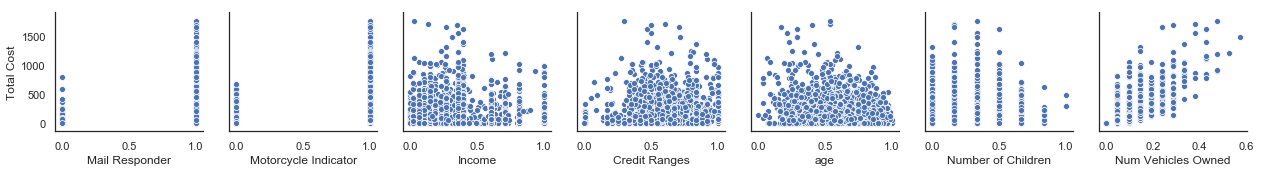

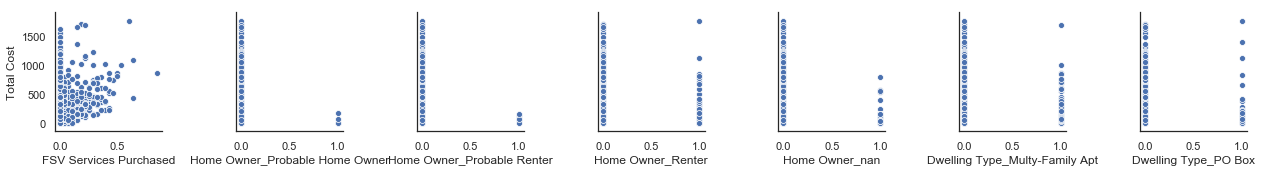

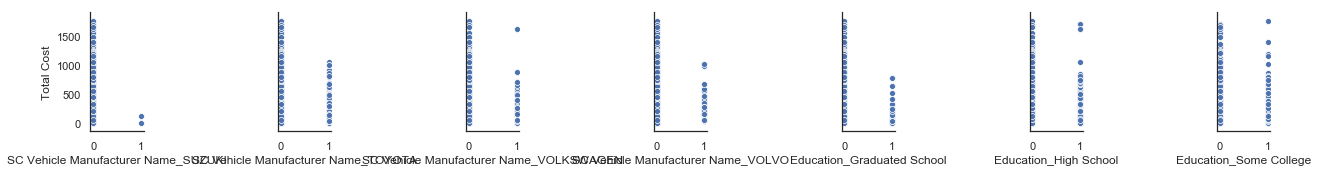

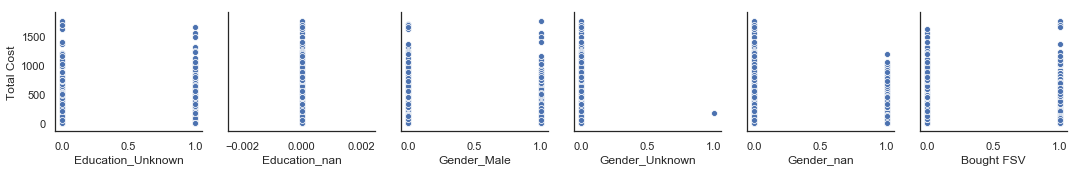

In [147]:
DF = scaled_df
variables = list(DF.columns)[:-1]
sns.pairplot(DF, x_vars=variables[:7], y_vars=['Total Cost'])
sns.pairplot(DF, x_vars=variables[7:14], y_vars=['Total Cost'])
snsb.pairplot(DF, x_vars=variables[671:678], y_vars=['Total Cost'])
sns.pairplot(DF, x_vars=variables[678:684], y_vars=['Total Cost'])
plt.savefig('scaled_multiplots_corr', bbox_inches = 'tight')
plt.show

### Instantiate Models

In [176]:
ln = LinearRegression()
rg = Ridge()
lass = Lasso()
tree = DecisionTreeRegressor(max_depth = 4)

In [177]:
X = scaled_df.drop('Total Cost', axis = 1)
y = scaled_df['Total Cost']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

In [178]:
ln.fit(X_train, y_train)
rg.fit(X_train, y_train)
lass.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [184]:
model_metrics(lass)

Linear Results
RMSE = 104.61506, z_score = 0.59369, R_squared = 0.64754


[('RMSE', 104.61506), ('z_score', 0.59369), ('R2', 0.64754)]

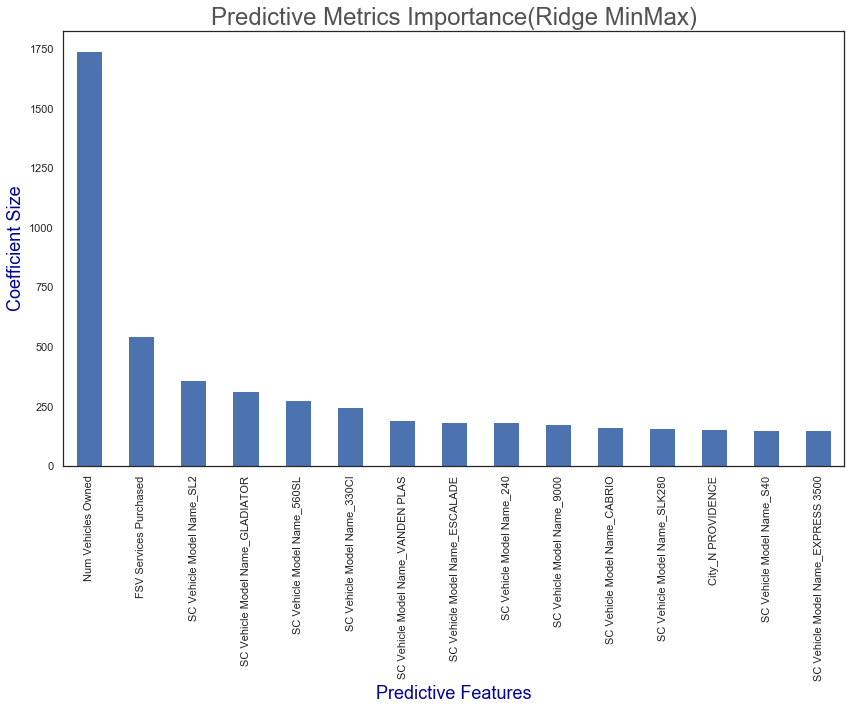

In [185]:
print_coefs(rg, 'Ridge MinMax')

### Try Droping Models Categorical

In [187]:
models = [item for item in normal_df.columns if 'SC Vehicle Model' in item]

In [191]:
test_df = normal_df.drop(columns = models)

In [192]:
test_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969.0,1,1,95.000000,708.333333,75.500000,0.0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338.0,1,0,15.000000,675.000000,89.000000,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718.0,1,0,55.000000,737.500000,68.000000,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524.0,1,1,157.857143,753.571429,49.000000,2.0,3,0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422.0,1,1,95.000000,668.750000,69.333333,0.0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [201]:
test_df.shape

(3273, 230)

In [226]:
ln = LinearRegression()
rg = Ridge()
lass = Lasso()
tree = DecisionTreeRegressor(max_depth = 4)

X = test_df.drop('Total Cost', axis = 1)
y = test_df['Total Cost']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

In [227]:
rg.fit(X_train, y_train)
lass.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [228]:
model_metrics(rg, 'Ridge no Models')

Ridge no Models Results
RMSE = 105.78991, z_score = 0.60035, R_squared = 0.63958


[('RMSE', 105.78991), ('z_score', 0.60035), ('R2', 0.63958)]

In [229]:
model_metrics(lass, 'Lasso no Models')

Lasso no Models Results
RMSE = 102.48228, z_score = 0.58158, R_squared = 0.66176


[('RMSE', 102.48228), ('z_score', 0.58158), ('R2', 0.66176)]

In [230]:
model_metrics(tree, 'Tree no Car Models')

Tree no Car Models Results
RMSE = 112.47169, z_score = 0.63827, R_squared = 0.59261


[('RMSE', 112.47169), ('z_score', 0.63827), ('R2', 0.59261)]

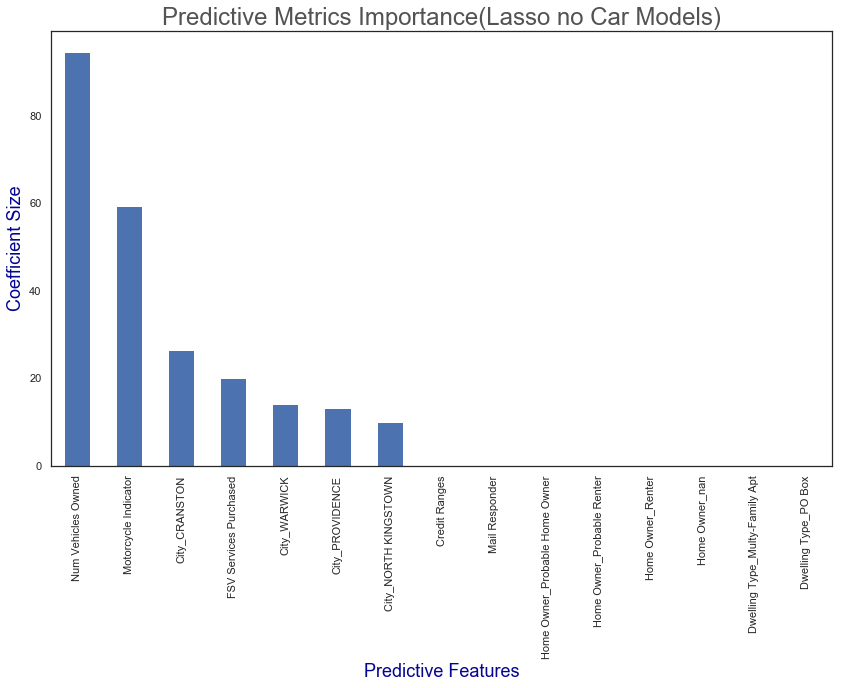

In [234]:
print_coefs(lass, 'Lasso no Car Models')

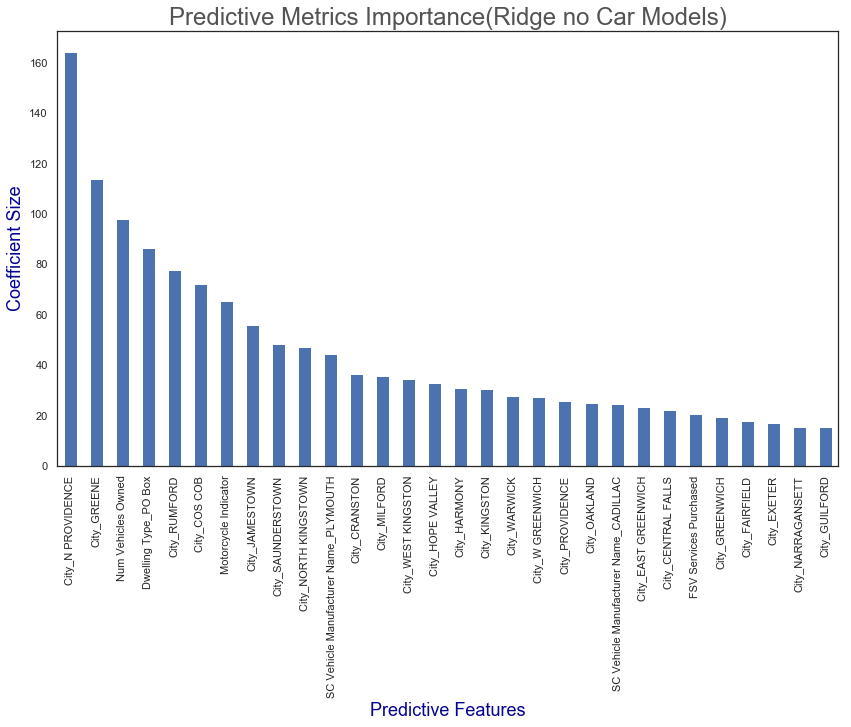

In [233]:
print_coefs(rg, 'Ridge no Car Models', num_feat=30)

### Tree

<function matplotlib.pyplot.show(*args, **kw)>

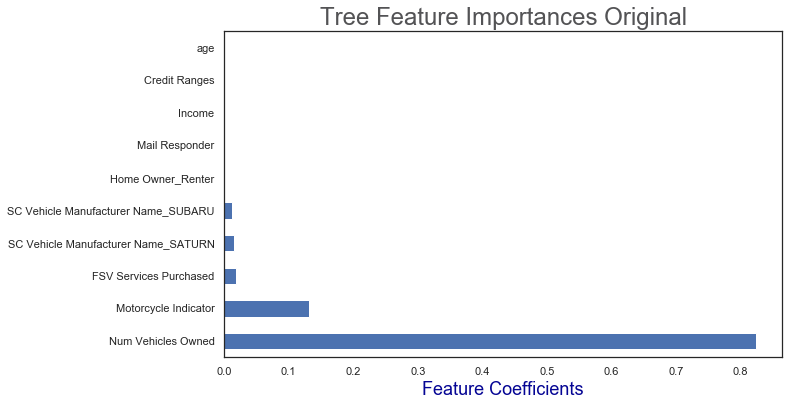

In [236]:
plt.figure(figsize = (10,6))
plt.title('Tree Feature Importances Original', fontsize = 24, color = "#535355")
plt.xlabel('Feature Coefficients', fontsize = 18, color = "#050594")
# plt.ylabel('Feature Name', fontsize = 18, color = "#050594")
# plt.xticks(rotation=rotation)
pd.Series(tree.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.savefig('Decision Tree no Car MOdels', bbox_inches = 'tight')
plt.show

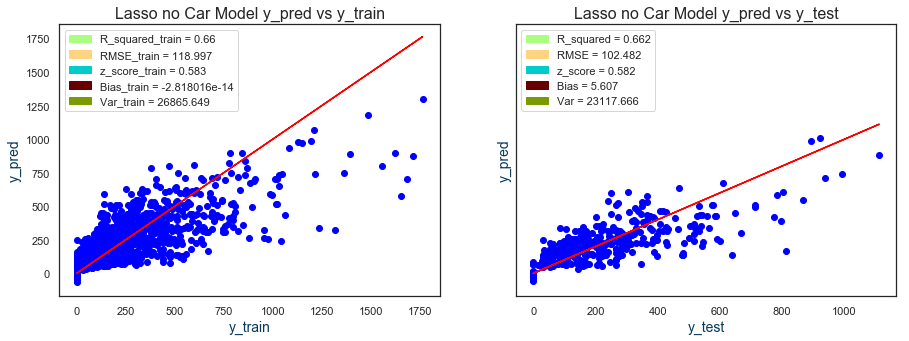

In [237]:
compare_test_train(lass, model_name = 'Lasso no Car Model')

### Try removing Cities

In [238]:
cities = [item for item in normal_df.columns if 'City_' in item]
test_df = test_df.drop(columns = cities)
test_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969.0,1,1,95.000000,708.333333,75.500000,0.0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338.0,1,0,15.000000,675.000000,89.000000,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718.0,1,0,55.000000,737.500000,68.000000,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524.0,1,1,157.857143,753.571429,49.000000,2.0,3,0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422.0,1,1,95.000000,668.750000,69.333333,0.0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [243]:
models[:5], cities[:5]

(['SC Vehicle Model Name_1500',
  'SC Vehicle Model Name_190D',
  'SC Vehicle Model Name_2',
  'SC Vehicle Model Name_200',
  'SC Vehicle Model Name_2019-09-03 00:00:00'],
 ['City_ALBION',
  'City_ANSONIA',
  'City_ASHAWAY',
  'City_AVON',
  'City_BARRINGTON'])

In [244]:
scaled_df = scaled_df.drop(columns = cities)
scaled_df = scaled_df.drop(columns = models)
scaled_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969,1,1,0.354167,0.612403,0.685897,0.000000,0.095238,0.0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338,1,0,0.020833,0.501661,0.858974,0.166667,0.000000,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718,1,0,0.187500,0.709302,0.589744,0.000000,0.000000,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524,1,1,0.616071,0.762696,0.346154,0.333333,0.142857,0.0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422,1,1,0.354167,0.480897,0.606838,0.000000,0.095238,0.0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


### Save Smaller DFs for Later Models

In [246]:
test_df.to_csv('normal_df_reduced.csv')
scaled_df.to_csv('scaled_df_reduced.csv')

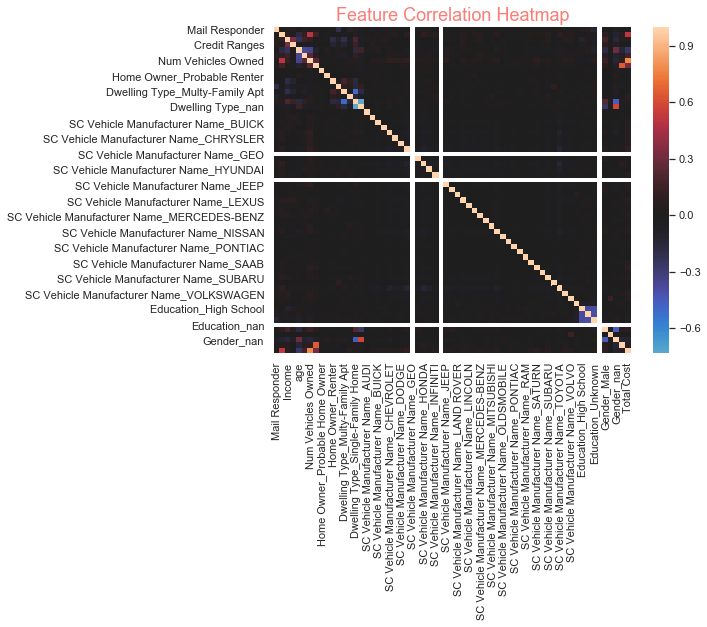

In [256]:
plt.figure(figsize = (8,6))
plt.title("Feature Correlation Heatmap", fontsize = 18, color = "#F97E77")
sns.heatmap(test_df.corr(), center = 0)

In [259]:
# Create correlation matrix
corr_matrix = test_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#Drop variables from table
test_df.drop(columns=to_drop, inplace=True)
test_df.shape

(3273, 63)

<function matplotlib.pyplot.show(*args, **kw)>

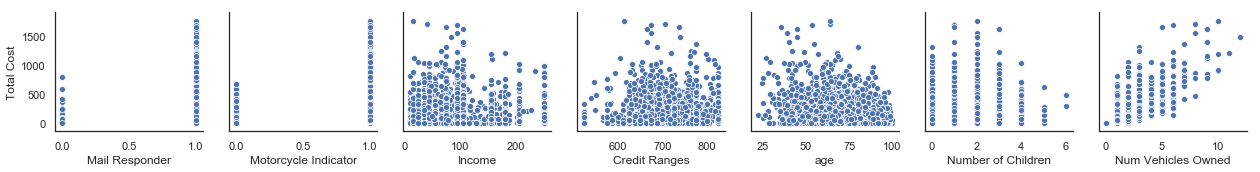

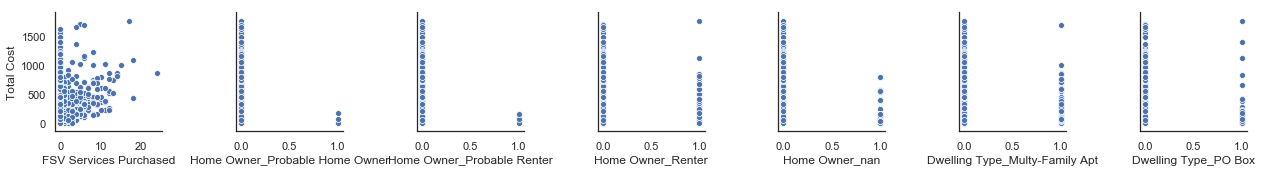

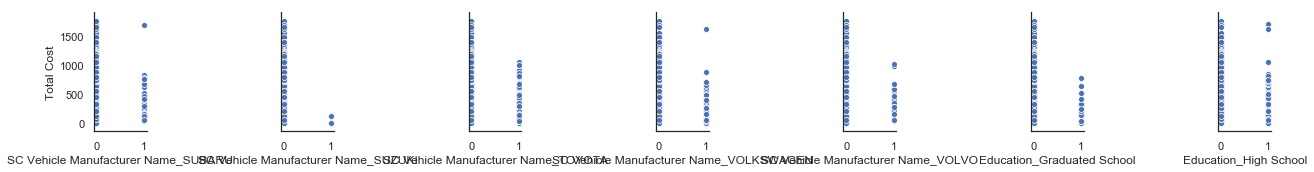

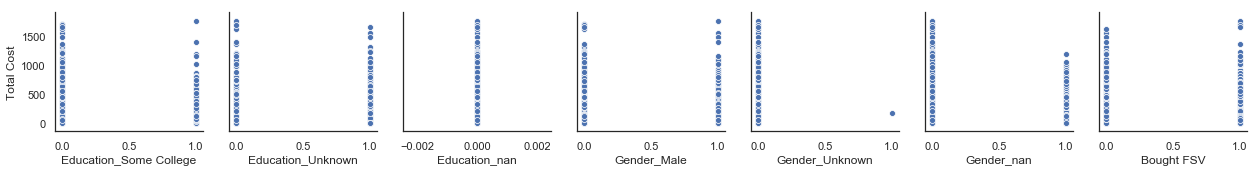

In [262]:
DF = test_df
variables = list(DF.columns)[:-1]
sns.pairplot(DF, x_vars=variables[:7], y_vars=['Total Cost'])
sns.pairplot(DF, x_vars=variables[7:14], y_vars=['Total Cost'])
sns.pairplot(DF, x_vars=variables[48:55], y_vars=['Total Cost'])
sns.pairplot(DF, x_vars=variables[55:62], y_vars=['Total Cost'])
plt.savefig('scaled_multiplots_corr', bbox_inches = 'tight')
plt.show

### Final Model Running

In [310]:
lin = LinearRegression()
rg = Ridge()
lass = Lasso(alpha = 0.12)
tree = DecisionTreeRegressor(max_depth = 3)

X = test_df.drop('Total Cost', axis = 1)
y = test_df['Total Cost']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

In [311]:
lin.fit(X_train, y_train)
rg.fit(X_train, y_train)
lass.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [312]:
model_metrics(lass, 'Ridge')

Ridge Results
RMSE = 103.91115, z_score = 0.58969, R_squared = 0.65226


[('RMSE', 103.91115), ('z_score', 0.58969), ('R2', 0.65226)]

In [313]:
model_metrics(tree, 'Tree')

Tree Results
RMSE = 108.61846, z_score = 0.6164, R_squared = 0.62005


[('RMSE', 108.61846), ('z_score', 0.6164), ('R2', 0.62005)]

### Ridge Viz

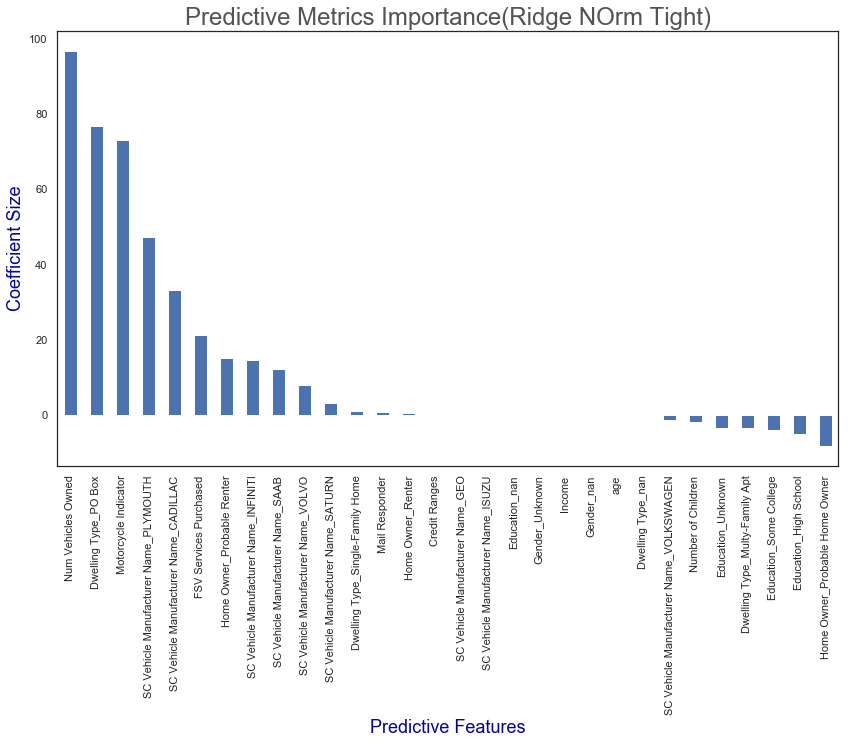

In [316]:
print_coefs(rg, 'Ridge NOrm Tight', num_feat=30)

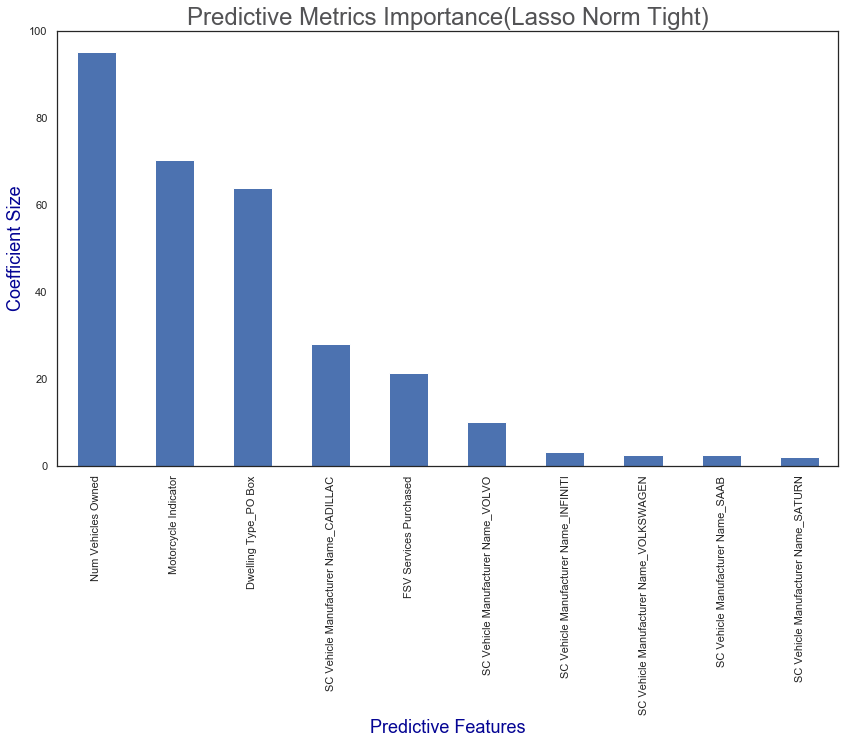

In [315]:
print_coefs(lass, 'Lasso Norm Tight', num_feat=10)

<function matplotlib.pyplot.show(*args, **kw)>

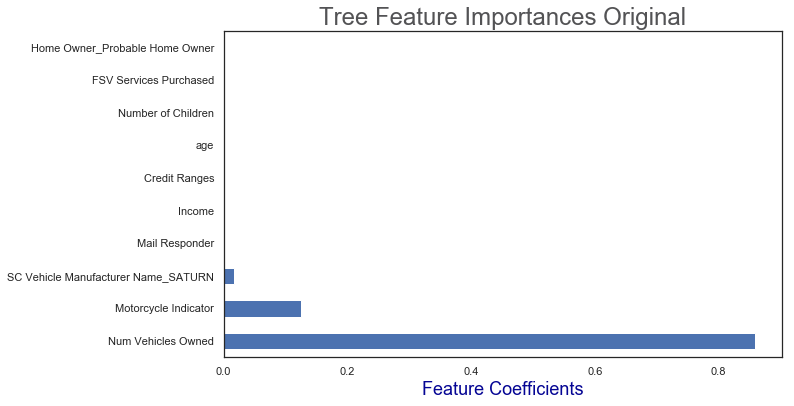

In [293]:
plt.figure(figsize = (10,6))
plt.title('Tree Feature Importances Original', fontsize = 24, color = "#535355")
plt.xlabel('Feature Coefficients', fontsize = 18, color = "#050594")
# plt.ylabel('Feature Name', fontsize = 18, color = "#050594")
# plt.xticks(rotation=rotation)
pd.Series(tree.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.savefig('Decision Tree Tight', bbox_inches = 'tight')
plt.show

### Try removing Manufacturer

In [317]:
manuf= [item for item in normal_df.columns if 'Manufactu' in item]
test_df = test_df.drop(columns = manuf)
test_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969.0,1,1,95.000000,708.333333,75.500000,0.0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338.0,1,0,15.000000,675.000000,89.000000,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718.0,1,0,55.000000,737.500000,68.000000,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524.0,1,1,157.857143,753.571429,49.000000,2.0,3,0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422.0,1,1,95.000000,668.750000,69.333333,0.0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [318]:
scaled_df = scaled_df.drop(columns = manuf)
scaled_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969,1,1,0.354167,0.612403,0.685897,0.000000,0.095238,0.0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338,1,0,0.020833,0.501661,0.858974,0.166667,0.000000,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718,1,0,0.187500,0.709302,0.589744,0.000000,0.000000,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524,1,1,0.616071,0.762696,0.346154,0.333333,0.142857,0.0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422,1,1,0.354167,0.480897,0.606838,0.000000,0.095238,0.0,0,0,...,1,0,0,0,0,0,0,0,0,118.85


In [328]:
lin = LinearRegression()
rg = Ridge()
lass = Lasso(alpha = 0.18)
tree = DecisionTreeRegressor(max_depth = 4)

X = scaled_df.drop('Total Cost', axis = 1)
y = scaled_df['Total Cost']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

In [329]:
lin.fit(X_train, y_train)
rg.fit(X_train, y_train)
lass.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [330]:
model_metrics(tree, 'Linear')

Linear Results
RMSE = 106.61863, z_score = 0.60506, R_squared = 0.63391


[('RMSE', 106.61863), ('z_score', 0.60506), ('R2', 0.63391)]

<function matplotlib.pyplot.show(*args, **kw)>

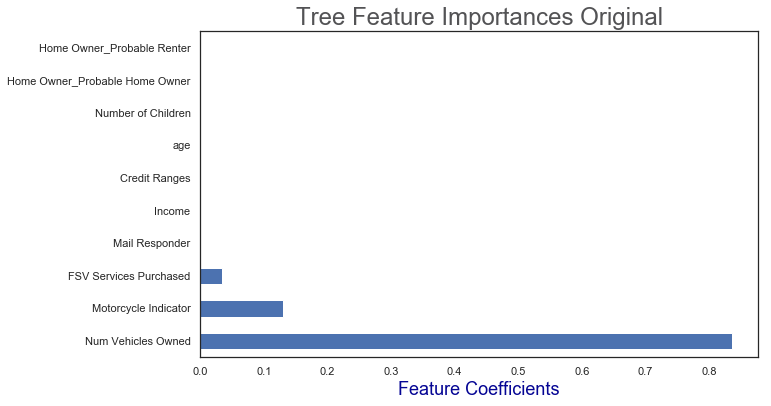

In [331]:
plt.figure(figsize = (10,6))
plt.title('Tree Feature Importances Original', fontsize = 24, color = "#535355")
plt.xlabel('Feature Coefficients', fontsize = 18, color = "#050594")
# plt.ylabel('Feature Name', fontsize = 18, color = "#050594")
# plt.xticks(rotation=rotation)
pd.Series(tree.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.savefig('Decision Tree Smallest Scaled', bbox_inches = 'tight')
plt.show

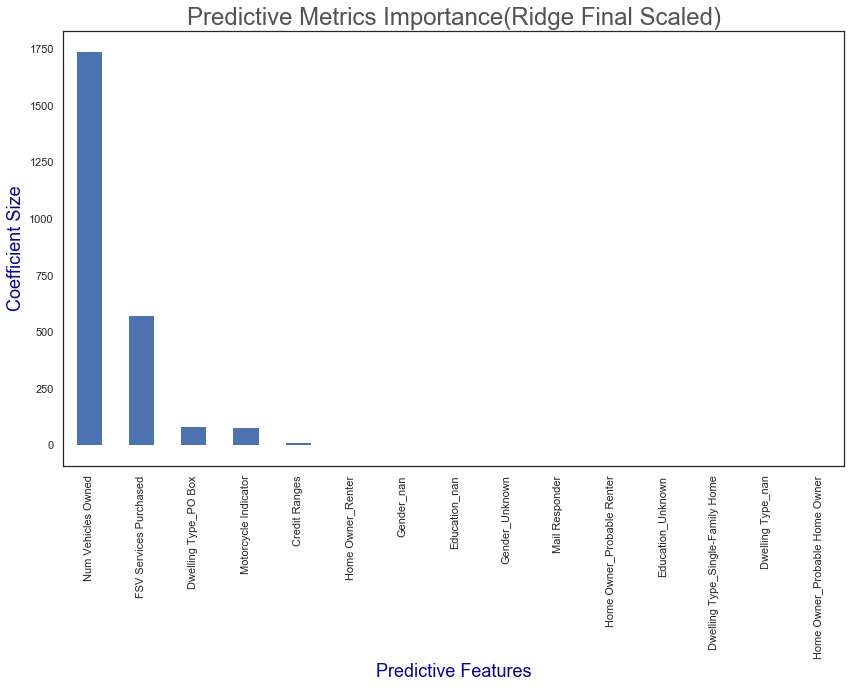

In [333]:
print_coefs(rg, 'Ridge Final Scaled', num_feat=15)

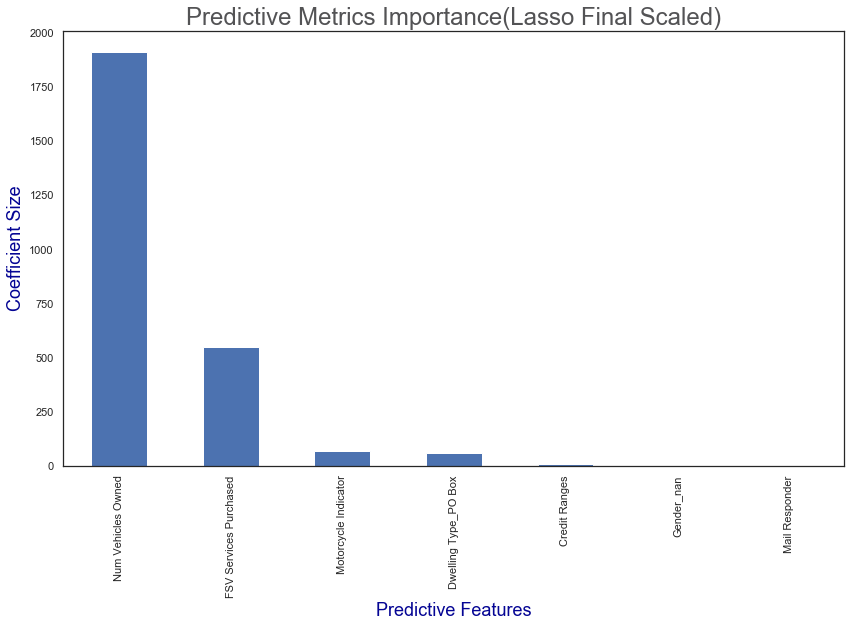

In [336]:
print_coefs(lass, 'Lasso Final Scaled', num_feat=7)

<function matplotlib.pyplot.show(*args, **kw)>

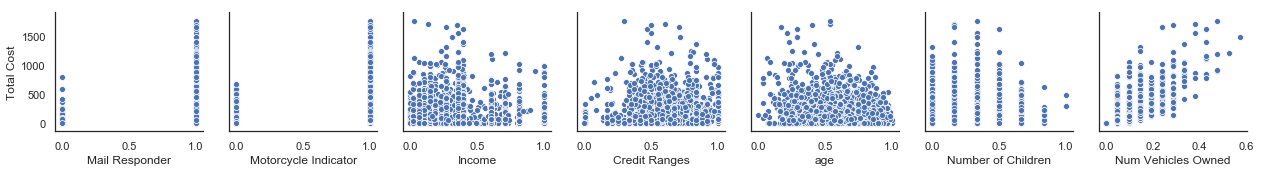

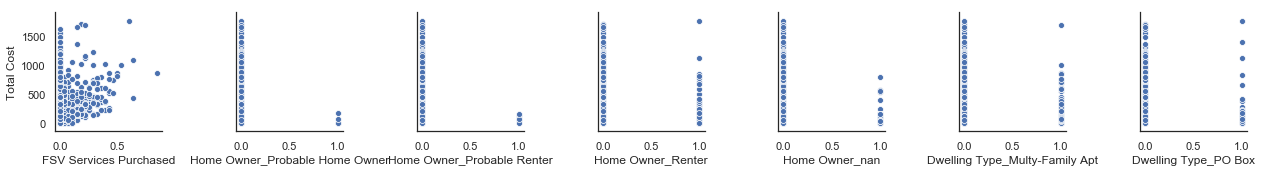

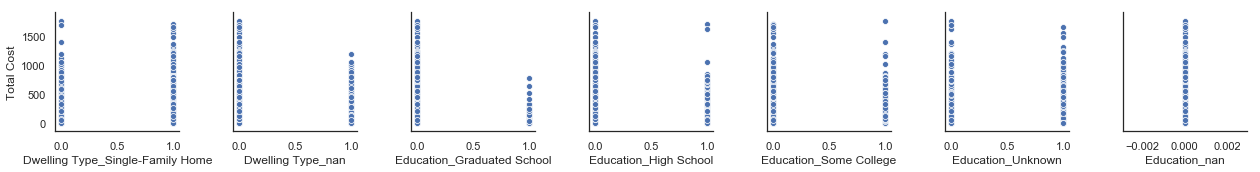

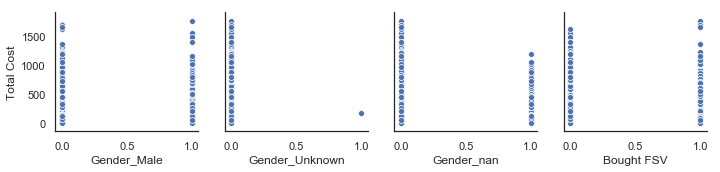

In [340]:
DF = scaled_df
variables = list(DF.columns)[:-1]
sns.pairplot(DF, x_vars=variables[:7], y_vars=['Total Cost'])
sns.pairplot(DF, x_vars=variables[7:14], y_vars=['Total Cost'])
sns.pairplot(DF, x_vars=variables[14:21], y_vars=['Total Cost'])
sns.pairplot(DF, x_vars=variables[21:27], y_vars=['Total Cost'])
plt.savefig('scaled final corr', bbox_inches = 'tight')
plt.show

In [341]:
scaled_df.head()

,Mail Responder,Motorcycle Indicator,Income,Credit Ranges,age,Number of Children,Num Vehicles Owned,FSV Services Purchased,Home Owner_Probable Home Owner,Home Owner_Probable Renter,...,Education_Graduated School,Education_High School,Education_Some College,Education_Unknown,Education_nan,Gender_Male,Gender_Unknown,Gender_nan,Bought FSV,Total Cost
Household Key,,,,,,,,,,,,,,,,,,,,,
969,1,1,0.354167,0.612403,0.685897,0.000000,0.095238,0.0,0,0,...,0,1,0,0,0,1,0,0,0,226.10
3338,1,0,0.020833,0.501661,0.858974,0.166667,0.000000,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0.00
8718,1,0,0.187500,0.709302,0.589744,0.000000,0.000000,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0.00
11524,1,1,0.616071,0.762696,0.346154,0.333333,0.142857,0.0,0,0,...,0,0,1,0,0,1,0,0,0,294.25
13422,1,1,0.354167,0.480897,0.606838,0.000000,0.095238,0.0,0,0,...,1,0,0,0,0,0,0,0,0,118.85
